In [1]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from keras.models import Sequential
from keras.layers.core import Dense
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [10]:
def kmeans(k,X):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans
def crearSVM(kernel,X_train,y_train):
    svcl = SVC(kernel=kernel, gamma=10)
    svcl.fit(X_train,y_train[:,0])
    return svcl
def consufionMatrixRed(svcl,X_t,y_t):
    y_p = svcl.predict_classes(X_t)
    print(confusion_matrix(y_t,y_p))
def consufionMatrix(svcl,X_t,y_t):
    y_p = svcl.predict(X_t)
    print(confusion_matrix(y_t,y_p))    
def consufionMatrixKNN(svcl,X_t,y_t):
    y_p = svcl.predict(X_t)
    y_p = pd.DataFrame(y_p).idxmax(axis=1)
    print(confusion_matrix(y_t[:, 0],y_p.to_numpy()))
    
def crearModelo(X_train, y_train):
    k = 5
    knn = KNeighborsClassifier(k)
    model= knn.fit(X_train,y_train)
    return model
def crearRed(X_train, y_train, dim):
    model = Sequential()
    #Agregar capas
    model.add(Dense(5, input_dim = dim, activation = 'relu' ))
    model.add(Dense(5, input_dim = dim, activation = 'tanh' ))
    model.add(Dense(5, input_dim = dim, activation = 'sigmoid' ))
    model.add(Dense(5, input_dim = dim, activation = 'sigmoid' ))
    #relu = Rectificante Lineal
    #sigmoid = Tangencial Hiperbolica
    #tanh = Tangecial Hiperbolica
    model.add(Dense(2, activation = 'softmax'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['binary_accuracy'])
    model.fit(X_train, y_train, epochs = 50)
    scores = model.evaluate(X_train, y_train)
    print(scores)
    return model
def crearRedPCA(X_train, y_train, dim):
    model = Sequential()
    #Agregar capas
    model.add(Dense(2, input_dim = dim, activation = 'relu' ))
    model.add(Dense(2, input_dim = dim, activation = 'tanh' ))
    model.add(Dense(2, input_dim = dim, activation = 'sigmoid' ))
    model.add(Dense(2, input_dim = dim, activation = 'sigmoid' ))
    #relu = Rectificante Lineal
    #sigmoid = Tangencial Hiperbolica
    #tanh = Tangecial Hiperbolica
    model.add(Dense(2, activation = 'softmax'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['binary_accuracy'])
    model.fit(X_train, y_train, epochs = 50)
    scores = model.evaluate(X_train, y_train)
    print(scores)
    return model

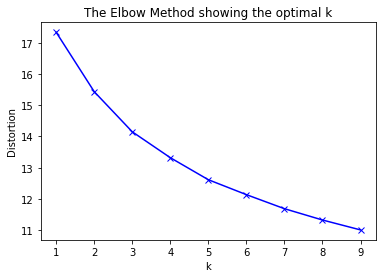

In [78]:
dataframe = pd.read_csv("nuevaData.csv",sep=',')
X=dataframe[['cap-shape','cap-surface','cap-color','bruises','odor','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-type','spore-print-color','population','habitat']].values

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
pca = PCA(2)
pca.fit(X)  
datospca = pca.transform(X)

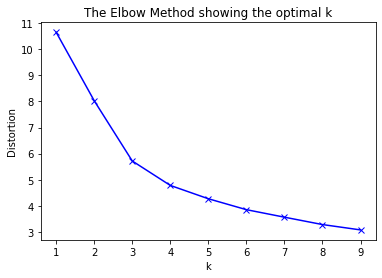

In [13]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(datospca)
    kmeanModel.fit(datospca)
    distortions.append(sum(np.min(cdist(datospca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / datospca.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
kmeans = kmeans(3,datospca)

In [15]:
y_kmeans = kmeans.predict(datospca)
print(y_kmeans)

[1 1 1 ... 1 0 1]


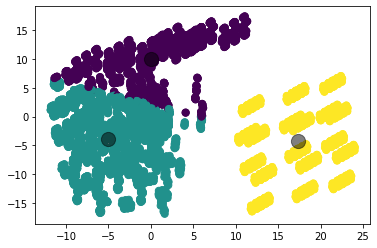

In [16]:
plt.scatter(datospca[:,0],datospca[:,1],c=y_kmeans,s=50,cmap='viridis')
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0],centroides[:,1],c='black',s=200,alpha=0.5)

In [17]:
d1=dataframe[['cap-shape','cap-surface','cap-color','bruises','odor','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-type','spore-print-color','population','habitat']]
d2=pd.DataFrame({'Class': y_kmeans})
d3=pd.concat([d1,d2], axis=1)

print(d3)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-size  gill-color  \
0             3            5          8       11     1          8          15   
1             3            5          7       11    12          4          15   
2             4            5          9       11    13          4           8   
3             3            7          9       11     1          8           8   
4             3            5         10        6     8          4          15   
...         ...          ...        ...      ...   ...        ...         ...   
8119         15            5          8        6     8          4           7   
8120          3            5          8        6     8          4           7   
8121          6            5          8        6     8          4           8   
8122         15            7          8        6     7          8           4   
8123          3            5          8        6     8          4           7   

      stalk-shape  stalk-ro

### SIN PCA

In [3]:
df = pd.read_csv('nuevaData.csv', delimiter=',')
X=df[['cap-shape','cap-surface','cap-color','bruises','odor','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-type','spore-print-color','population','habitat']].values
y=df[['class']].values

# #aux = []

# for i in y[:,0]:
#     if(i == 1):
#         aux.append(0)
#     else:
#         aux.append(1)
        
# print(aux)

# columnas = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-type','spore-print-color','population','habitat']

# nueva_data = pd.DataFrame(X, columns = columnas)
# nueva_data['class'] = aux
# nueva_data.to_csv('nuevaData.csv', index = False, header = True, sep = ',')
    
X_scaled = preprocessing.scale(X)
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,random_state = 0)


y_train_d = np.array(pd.get_dummies(y_train[:, 0],columns=['class']))
y_test_d = np.array(pd.get_dummies(y_test[:,0],columns=['class']))

### SVC

In [15]:
kernel = "rbf"
#kernel = "linear"
#kernel = "poly"
#kernel = "sigmoid"
modeloSVM = crearSVM(kernel,X_train,y_train)

In [16]:
consufionMatrix(modeloSVM,X_train,y_train)
consufionMatrix(modeloSVM,X_test,y_test)

[[2946    0]
 [   0 3147]]
[[970   0]
 [116 945]]


In [17]:
filename= 'modeloSVM.h5'
pickle.dump(modeloSVM, open(filename,'wb'))

### KNN

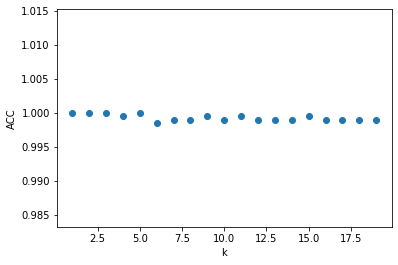

In [73]:
k_rango = range(1,20)
scores=[]
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train_d)
    scores.append(knn.score(X_test,y_test_d))
plt.figure()
plt.xlabel('k')
plt.ylabel('ACC')
plt.scatter(k_rango,scores)

Text(0, 0.5, 'ERROR')

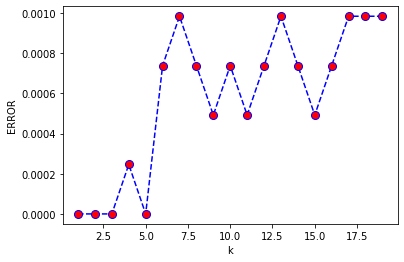

In [74]:
k_rango = range(1,20)
error_rate=[]
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train_d)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k!=y_test_d))
plt.figure()
plt.plot(k_rango,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='8')
plt.xlabel('k')
plt.ylabel('ERROR')

In [80]:
model=crearModelo(X_train,y_train_d)
print('ACC Train',knn.score(X_train,y_train_d))
print('ACC Test',knn.score(X_test,y_test_d))

ACC Train 0.9978664040702445
ACC Test 0.999015263417036


In [38]:

pred = knn.predict(X_test)
print(pred)

[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 1]]


In [81]:
consufionMatrixKNN(model,X_train,y_train)
consufionMatrixKNN(model,X_test,y_test)

[[2942    4]
 [   0 3147]]
[[ 970    0]
 [   0 1061]]


In [82]:
filename= 'modeloKNN.h5'
pickle.dump(model, open(filename,'wb'))

### Redes Neuronales

In [89]:
Red=crearRed(X_train, y_train_d, 17)

Epoch 1/50
6093/6093 [==============================] - 0s 74us/step - loss: 0.2253 - binary_accuracy: 0.7724
Epoch 2/50
6093/6093 [==============================] - 0s 47us/step - loss: 0.1233 - binary_accuracy: 0.9158
Epoch 3/50
6093/6093 [==============================] - 0s 53us/step - loss: 0.0646 - binary_accuracy: 0.9412
Epoch 4/50
6093/6093 [==============================] - 0s 50us/step - loss: 0.0288 - binary_accuracy: 0.9890
Epoch 5/50
6093/6093 [==============================] - 0s 53us/step - loss: 0.0150 - binary_accuracy: 0.9929
Epoch 6/50
6093/6093 [==============================] - 0s 58us/step - loss: 0.0075 - binary_accuracy: 0.9975
Epoch 7/50
6093/6093 [==============================] - 0s 48us/step - loss: 0.0040 - binary_accuracy: 0.9995
Epoch 8/50
6093/6093 [==============================] - 0s 61us/step - loss: 0.0026 - binary_accuracy: 0.9997
Epoch 9/50
6093/6093 [==============================] - 0s 48us/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 10/5

In [91]:
consufionMatrixRed(Red,X_train,y_train)
consufionMatrixRed(Red,X_test,y_test)

[[2946    0]
 [   0 3147]]
[[ 970    0]
 [   0 1061]]


In [92]:
filename= 'modeloRN.h5'
pickle.dump(Red, open(filename,'wb'))

### CON PCA

In [94]:
pca = PCA(2)
pca.fit(X)  
#pickle.dump(pca, open('ModeloPCA.h5','wb'))
datospca = pca.transform(X)
X_trainPCA,X_testPCA,y_trainPCA,y_testPCA= train_test_split(datospca,y,random_state = 0)

y_trainPCA_d = np.array(pd.get_dummies(y_trainPCA[:, 0],columns=['class']))
y_testPCA_d = np.array(pd.get_dummies(y_testPCA[:,0],columns=['class']))

### SVC

In [98]:
#kernel = "rbf"
#kernel = "linear"
#kernel = "poly"
kernel = "sigmoid"
modeloSVM = crearSVM(kernel,X_trainPCA,y_trainPCA[: , 0])

In [99]:
consufionMatrix(modeloSVM,X_trainPCA,y_trainPCA)
consufionMatrix(modeloSVM,X_testPCA,y_testPCA)

[[1558 1388]
 [1400 1747]]
[[526 444]
 [465 596]]


In [100]:
filename= 'modeloSVMPCA.h5'
pickle.dump(modeloSVM, open(filename,'wb'))

### KNN

In [101]:
model=crearModelo(X_trainPCA,y_trainPCA_d)
consufionMatrixKNN(model,X_trainPCA,y_trainPCA)
consufionMatrixKNN(model,X_testPCA,y_testPCA)

[[2831  115]
 [  90 3057]]
[[ 916   54]
 [  54 1007]]


In [102]:
filename= 'modeloKNNPCA.h5'
pickle.dump(model, open(filename,'wb'))

### Redes Neuronales

In [107]:
Red=crearRedPCA(X_trainPCA,y_trainPCA_d,2)

Epoch 1/50
6093/6093 [==============================] - 0s 79us/step - loss: 0.2499 - binary_accuracy: 0.5165
Epoch 2/50
6093/6093 [==============================] - 0s 52us/step - loss: 0.2486 - binary_accuracy: 0.5165
Epoch 3/50
6093/6093 [==============================] - 0s 51us/step - loss: 0.2430 - binary_accuracy: 0.5936
Epoch 4/50
6093/6093 [==============================] - 0s 48us/step - loss: 0.2240 - binary_accuracy: 0.8182
Epoch 5/50
6093/6093 [==============================] - 0s 50us/step - loss: 0.1953 - binary_accuracy: 0.8191
Epoch 6/50
6093/6093 [==============================] - 0s 49us/step - loss: 0.1719 - binary_accuracy: 0.8241
Epoch 7/50
6093/6093 [==============================] - 0s 50us/step - loss: 0.1575 - binary_accuracy: 0.8260
Epoch 8/50
6093/6093 [==============================] - 0s 49us/step - loss: 0.1496 - binary_accuracy: 0.8273
Epoch 9/50
6093/6093 [==============================] - 0s 50us/step - loss: 0.1457 - binary_accuracy: 0.8277
Epoch 10/5

In [108]:
consufionMatrixRed(Red,X_trainPCA,y_trainPCA)
consufionMatrixRed(Red,X_testPCA,y_testPCA)

[[2305  641]
 [ 343 2804]]
[[776 194]
 [102 959]]


In [109]:
filename= 'modeloRNPCA.h5'
pickle.dump(Red, open(filename,'wb'))